In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.optimize import curve_fit

Set figure font size

In [2]:
FS = 40

Get dictionary with number of synapses per climbing fiber branch per time step for different iterations of the simulation

In [3]:
fname = './data/p3_p7_evolve_results/190211_evolve_p3_p7_nsyns_per_cf_per_ts_pr_0.005_g_1.1_niter_10.json'

In [4]:
with open(fname,'r') as f:
    nsdict = json.loads(f.read())

In [5]:
# Inspect dict keys
nsdict.keys()

dict_keys(['cf_id', 'sim_iteration', 'timestep', 'nsyns_per_ts'])

In [6]:
print(len(nsdict['cf_id']),len(nsdict['sim_iteration']),len(nsdict['timestep']),len(nsdict['nsyns_per_ts']))

472838 472838 472838 472838


In [7]:
# Define a function to fit the data for number of synapses vs. time step with a line
def line_fit(x,m,b):
    y = m*x + b
    return y

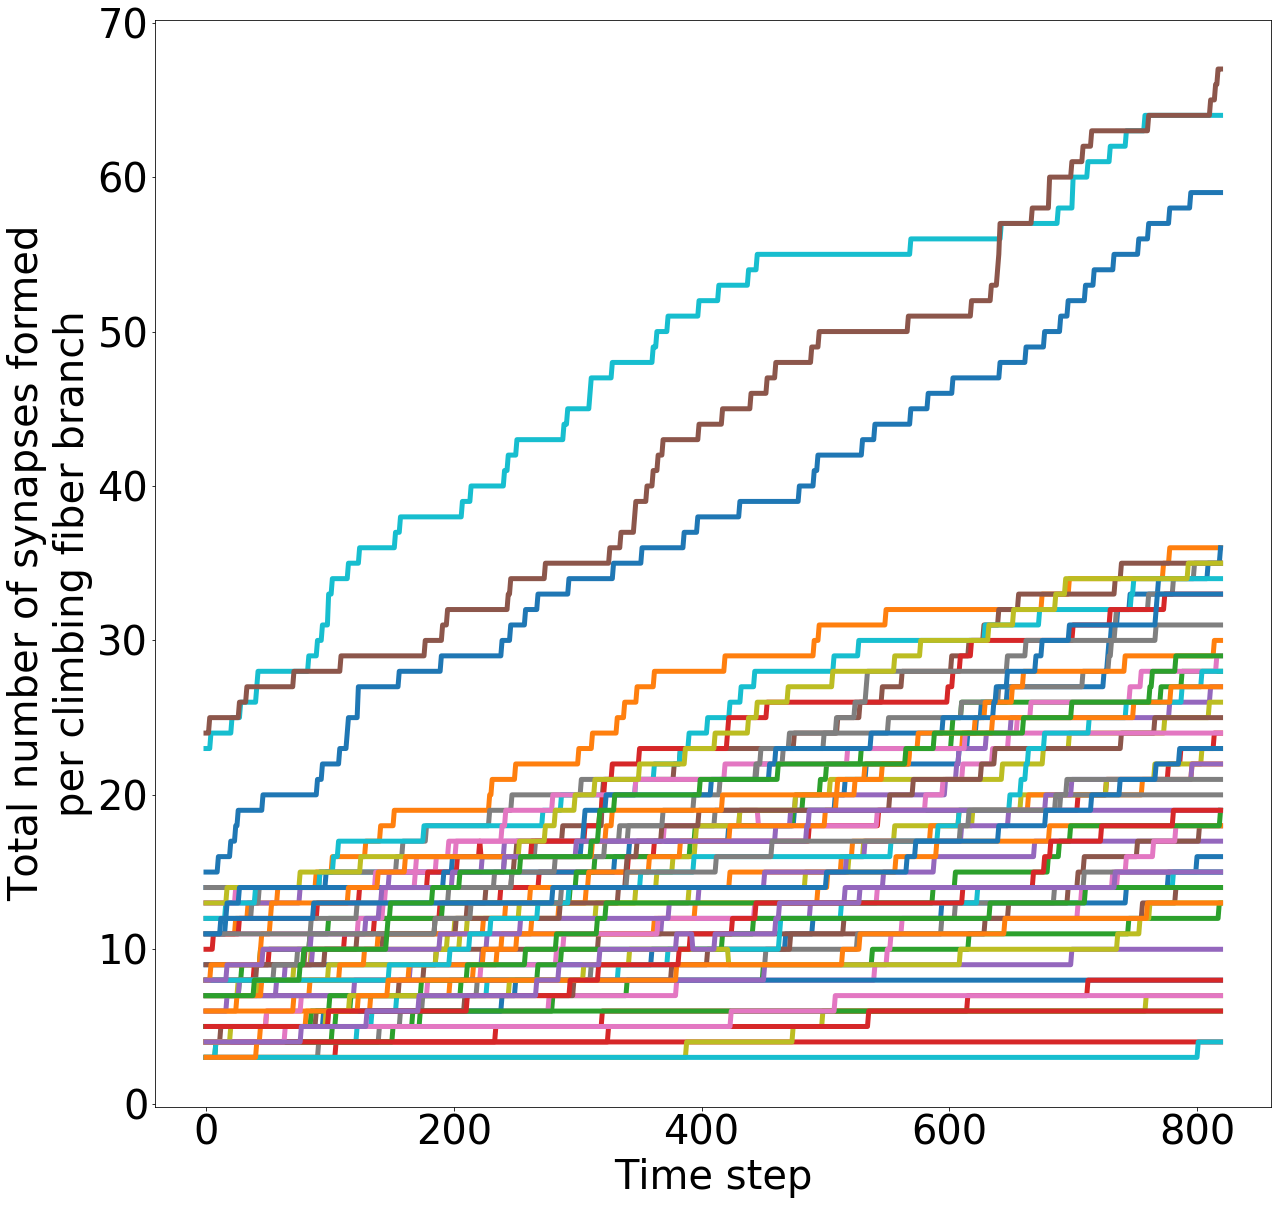

In [16]:
# Plot the number of synapses formed by each climbing fiber branch per time step, per simulation iteration
# Just aggregate all the data.
iterations = list(set(nsdict['sim_iteration']))
plt.figure(figsize=(20,20))

syn_add_rem_rates = []
for itercurr in iterations:
    rowscurr = [i for i,q in enumerate(nsdict['sim_iteration']) if q == itercurr]
    cfscurr = [nsdict['cf_id'][q] for q in rowscurr]
    
    for cf in list(set(cfscurr)):
        rcf = [q for q in rowscurr if ((nsdict['sim_iteration'][q] == itercurr) and (nsdict['cf_id'][q] == cf))]
        tscf = [nsdict['timestep'][q] for q in rcf]
        nscf = [nsdict['nsyns_per_ts'][q] for q in rcf]
        # plot the number of synapses formed per time step per climbing fiber branch for this iteration
        # (only show the rates from one iteration of the simulation to be clear)
        if itercurr < 1:
            plt.plot(tscf,nscf,label='sim {0}, cf {1}'.format(itercurr,cf),linewidth=5)
        # fit this data with a line and store the slope (the rate of synapse addition or removal)
        popt,pcov = curve_fit(line_fit,tscf,nscf)
        syn_add_rem_rates.append(popt[0])
        
plt.xlabel('Time step',fontsize=FS)
plt.ylabel('Total number of synapses formed\nper climbing fiber branch',fontsize=FS)
plt.tick_params(labelsize=FS)
nsyns_fname = './data/figures/p3_p7_evolve/190214_p3_p7_evolve_nsyns_per_cf_single_sim.png'
# plt.title('Number of synapses formed per climbing fiber branch \n per time step, single simulation'.format(len(iterations)),fontsize=FS)
# plt.show()
plt.savefig(nsyns_fname)

Inspect the distribution of synapse addition and removal rates

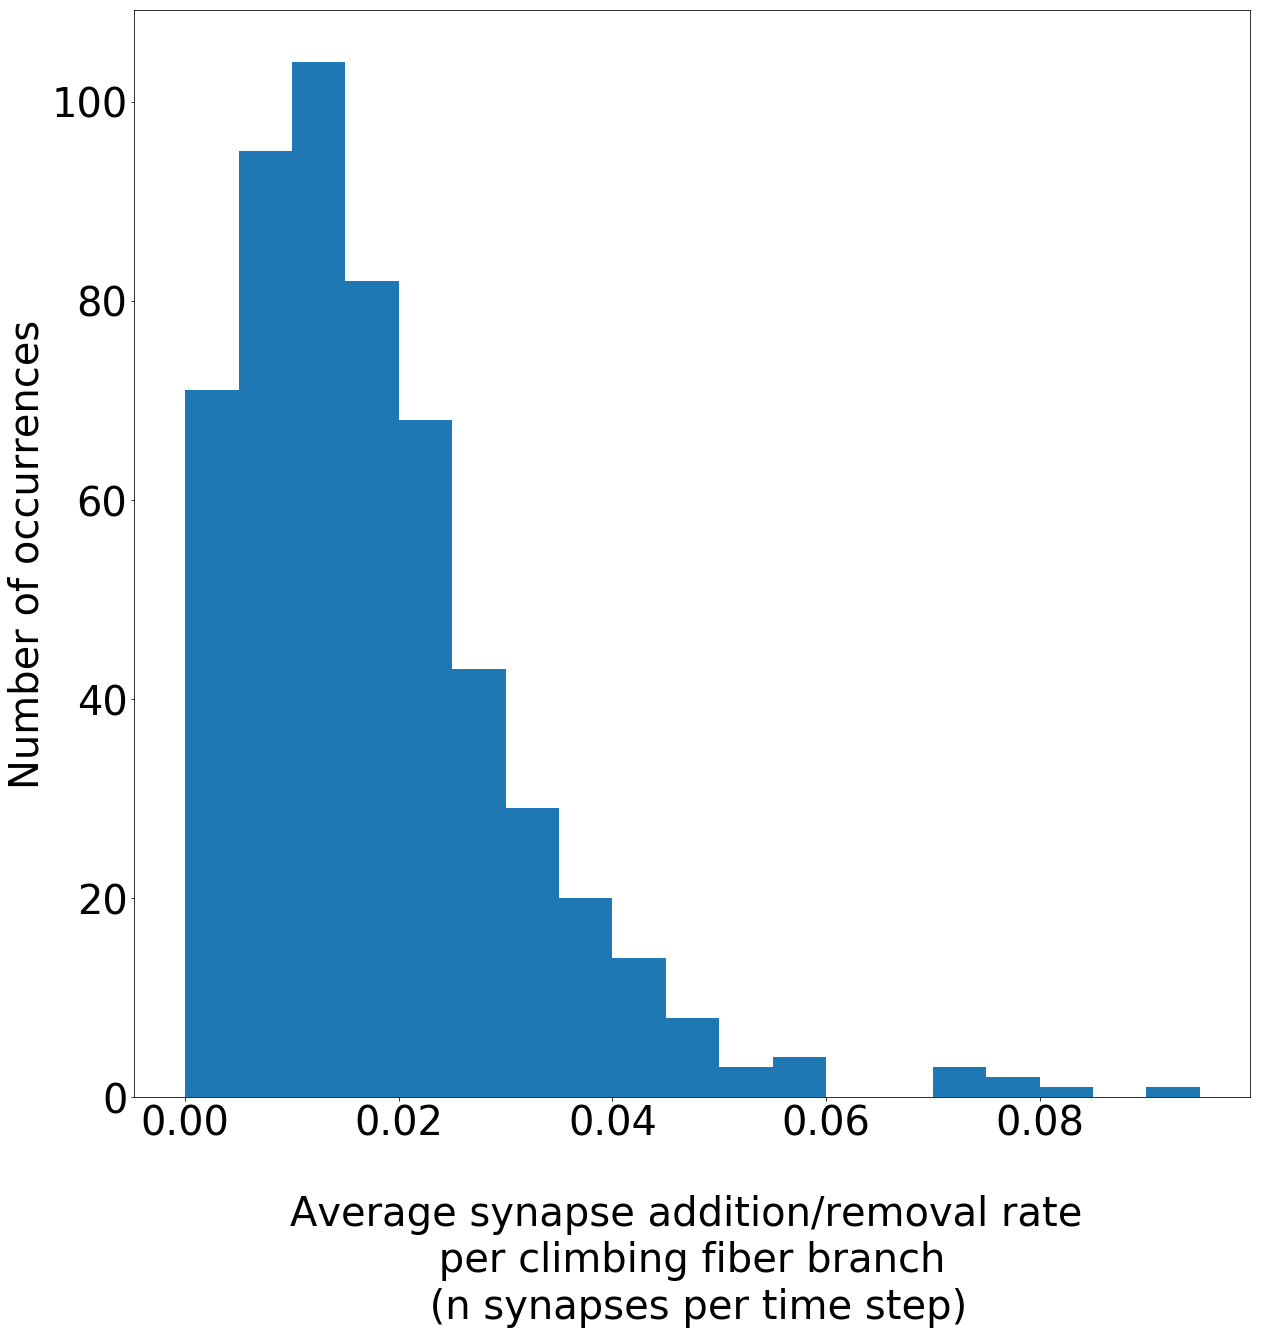

In [15]:
edges = np.arange(0,100,5)*0.001
plt.figure(figsize=(20,20))
plt.hist(syn_add_rem_rates,bins=edges)
plt.xlabel('\nAverage synapse addition/removal rate \n per climbing fiber branch \n (n synapses per time step)',fontsize=FS)
plt.ylabel('Number of occurrences',fontsize=FS)
# plt.title('Synapse addition rates for climbing fiber branches',fontsize=FS)
plt.tick_params(labelsize=FS)
synrates_fname = './data/figures/p3_p7_evolve/190214_avg_syn_add_rem_rates_niter_{0}.png'.format(len(iterations))
# plt.show()
plt.savefig(synrates_fname)

Compute median and maximum rates of synapse addition

In [10]:
med_sr = np.median(syn_add_rem_rates)
max_sr = np.max(syn_add_rem_rates)
print('median rate of synapse addition = {0} synapses per time step'.format(med_sr))
print('maximum rate of synapse addition = {0} synapses per time step'.format(max_sr))

median rate of synapse addition = 0.015108544236500519 synapses per time step
maximum rate of synapse addition = 0.09224612900491735 synapses per time step


Compute the length of a time step given the average number of time steps that cover the 4 days between p3 and p7

In [11]:
HOURS_PER_DAY = 24
n_ts_p3_p7 = 955
n_hours_p_ts = (4/n_ts_p3_p7) * HOURS_PER_DAY
print('number of hours per time step = {0}'.format(n_hours_p_ts))
print('number of minutes per time step = {0}'.format(n_hours_p_ts*60))

number of hours per time step = 0.1005235602094241
number of minutes per time step = 6.031413612565446


Compute the number of minutes between synapse addition events per climbing fiber branch

In [12]:
med_n_hours_per_syn = 1.0/(med_sr/n_hours_p_ts)
max_n_hours_per_syn = 1.0/(max_sr/n_hours_p_ts)
print('median number of hours per synapse addition event = {0}'.format(med_n_hours_per_syn))
print('maximum number of hours per synapse addition event = {0}'.format(max_n_hours_per_syn))

median number of hours per synapse addition event = 6.6534246209221575
maximum number of hours per synapse addition event = 1.0897320168748275
